<h2> Importing Libraries </h2>

In [17]:
import pandas as pd
import networkx as nx
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import csv
from sklearn.model_selection import train_test_split

<h2> Reading Data </h2>

In [2]:
# reading data
train_data=pd.read_csv('data/train.csv')
print(train_data.info())
print(train_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9437519 entries, 0 to 9437518
Data columns (total 2 columns):
 #   Column            Dtype
---  ------            -----
 0   source_node       int64
 1   destination_node  int64
dtypes: int64(2)
memory usage: 144.0 MB
None
   source_node  destination_node
0            1            690569
1            1            315892
2            1            189226
3            2            834328
4            2           1615927


In [3]:
#Checking missing values
print("Number of rows have missing values: ",len(train_data[train_data.isna().any(1)]))

Number of rows have missing values:  0


In [4]:
train_data.to_csv('data/train_woheader.csv',header=False,index=False)

<h2> Reading Graph using Networkx Library </h2>

In [5]:
graph=nx.read_edgelist('data/train_woheader.csv',delimiter=',',create_using=nx.DiGraph,nodetype=int)
print(nx.info(graph))

Name: 
Type: DiGraph
Number of nodes: 1862220
Number of edges: 9437519
Average in degree:   5.0679
Average out degree:   5.0679


In [6]:
train_data[0:50].to_csv('data/train_sample.csv',header=False,index=False)
subgraph=nx.read_edgelist('data/train_sample.csv',delimiter=',',create_using=nx.DiGraph,nodetype=int)

Name: 
Type: DiGraph
Number of nodes: 66
Number of edges: 50
Average in degree:   0.7576
Average out degree:   0.7576


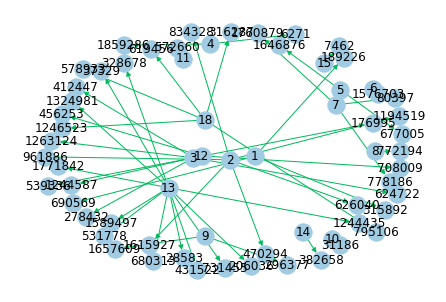

In [7]:
print(nx.info(subgraph))
pos=nx.spring_layout(subgraph)
nx.draw(subgraph,pos,node_color='#A0CBE2',edge_color='#00bb5e',width=1,with_labels=True)

<h2> Basic EDA </h2>


In [8]:
print("Total number of person in social media: ",len(graph.nodes()))

Total number of person in social media:  1862220


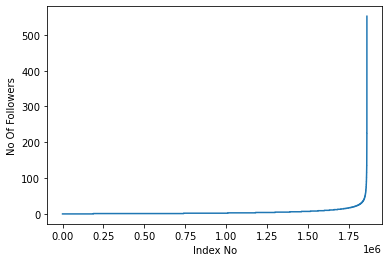

In [9]:
# Number of followers of each person
indegree_dist = list(dict(graph.in_degree()).values())
indegree_dist.sort()
plt.plot(indegree_dist)
plt.xlabel('Index No')
plt.ylabel('No Of Followers')
plt.show()

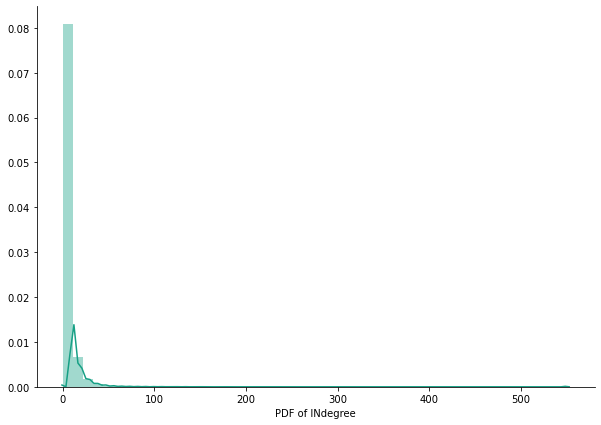

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)
sns.distplot(indegree_dist, color='#16A085')
plt.xlabel('PDF of INdegree')
sns.despine()

In [11]:
# Finding Number of person are not followed by anyone
print("Number of person not followed by anyone: ",sum(np.array(indegree_dist)==0))

Number of person not followed by anyone:  188043


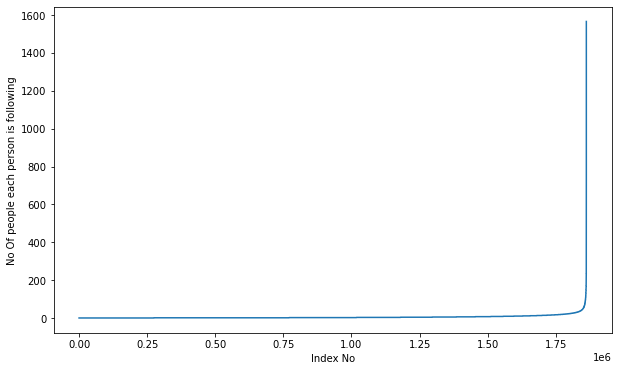

In [12]:
# Number of people each person following
outdegree_dist = list(dict(graph.out_degree()).values())
outdegree_dist.sort()
plt.figure(figsize=(10,6))
plt.plot(outdegree_dist)
plt.xlabel('Index No')
plt.ylabel('No Of people each person is following')
plt.show()

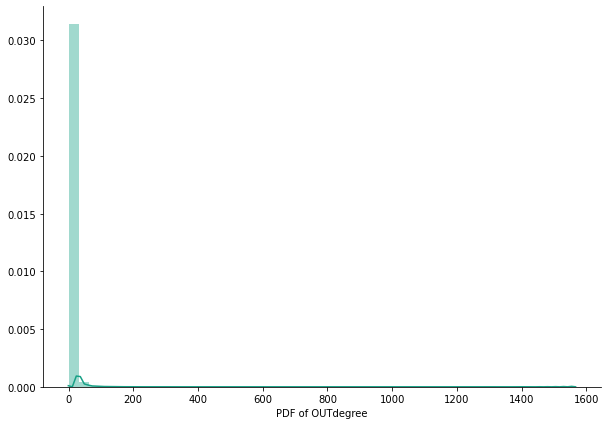

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)
sns.distplot(outdegree_dist, color='#16A085')
plt.xlabel('PDF of OUTdegree')
sns.despine()

In [14]:
# Finding Number of person are not following anyone.
print("Number of person not followed by anyone: ",sum(np.array(outdegree_dist)==0))

Number of person not followed by anyone:  274512


<h2> Adding pair of distinct nodes to make data balanced for training ML Models </h2>


In [ ]:
import random
r = csv.reader(open('data/train_woheader.csv','r'))
edges=dict()
for edge in r:
    edges[(edge[0],edge[1])]=1
distinctnodepair=set([])
while(len(distinctnodepair)<len(edges)):
    a=random.randint(1,graph.number_of_nodes())
    b=random.randint(1,graph.number_of_nodes())
    tmp=edges.get((a,b),-1)
    if tmp==-1 and a!=b:
        try:
            if nx.shortest_path_length(graph,source=a,target=b) > 2:
               distinctnodepair.add((a,b))
            else:
                continue
        except:
            distinctnodepair.add((a,b))
    else:
        continue

<h2> Splitting Data into train and test </h2>

In [19]:
linkednodes=pd.read_csv('data/train.csv')
disconnectednodes=pd.DataFrame(list(distinctnodepair),columns=['source_node','destination_node'])
X_train_pos, X_test_pos, y_train_pos, y_test_pos  = train_test_split(linkednodes,np.ones(len(linkednodes)),test_size=0.2, random_state=9)
X_train_neg, X_test_neg, y_train_neg, y_test_neg  = train_test_split(disconnectednodes,np.zeros(len(disconnectednodes))),test_size=0.2, random_state=9)
X_train_pos.to_csv('data/train_pos.csv',header=False, index=False)
X_test_pos.to_csv('data/test_pos.csv',header=False, index=False)
X_train_neg.to_csv('data/train_neg.csv',header=False, index=False)
X_test_neg.to_csv('data/test_neg.csv',header=False, index=False)
X_train = X_train_pos.append(X_train_neg,ignore_index=True)
y_train = np.concatenate((y_train_pos,y_train_neg))
X_test = X_test_pos.append(X_test_neg,ignore_index=True)
y_test = np.concatenate((y_test_pos,y_test_neg)) 
X_train.to_csv('data/after_eda/train_after_eda.csv',header=False,index=False)
X_test.to_csv('data/after_eda/test_after_eda.csv',header=False,index=False)
pd.DataFrame(y_train.astype(int)).to_csv('data/train_y.csv',header=False,index=False)
pd.DataFrame(y_test.astype(int)).to_csv('data/test_y.csv',header=False,index=False)

<h2> Feature Engineeing of Graph Data </h2>